In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
df = pd.read_excel('/content/gapminder_lifeexpectancy.xlsx')

In [9]:
df2 = pd.read_csv('/content/continents.csv', sep=";")

In [6]:
df.head(5)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,...,40.53,40.98,41.46,41.96,42.51,43.11,43.75,44.45,45.21,46.02,46.87,47.74,48.62,49.5,49.3,49.4,49.5,48.9,49.4,49.7,49.5,48.6,50.0,50.1,50.4,51.0,51.4,51.8,52.0,52.1,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,70.54,70.86,71.14,71.39,71.63,71.88,72.15,72.42,72.71,72.96,73.14,73.25,73.30,73.3,73.4,73.6,73.6,73.6,73.7,73.8,74.1,74.2,74.2,74.7,75.1,75.5,75.7,75.9,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,57.13,58.28,59.56,60.92,62.31,63.69,64.97,66.15,67.18,68.04,68.75,69.33,69.81,70.2,70.5,70.9,71.2,71.4,71.6,72.1,72.4,72.6,73.0,73.3,73.5,73.8,73.9,74.4,74.8,75.0,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [11]:
df2.head(5)

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [24]:
df1 = df[['Life expectancy',2000]]
#df1 = pd.DataFrame([2000])
df1

,Life expectancy,2000
0,Abkhazia,NaN
1,Afghanistan,50.1
2,Akrotiri and Dhekelia,NaN
3,Albania,74.7
4,Algeria,73.3
...,...,...
255,Yugoslavia,NaN
256,Zambia,44.8
257,Zimbabwe,47.9
258,Åland,80.0


In [19]:
df1.head()

,Life expectancy,2000
0,Abkhazia,NaN
1,Afghanistan,50.1
2,Akrotiri and Dhekelia,NaN
3,Albania,74.7
4,Algeria,73.3


In [25]:
df1 = df1.rename(columns={'Life expectancy': 'country',2000: 'Life expectancy'})
df1

,country,Life expectancy
0,Abkhazia,NaN
1,Afghanistan,50.1
2,Akrotiri and Dhekelia,NaN
3,Albania,74.7
4,Algeria,73.3
...,...,...
255,Yugoslavia,NaN
256,Zambia,44.8
257,Zimbabwe,47.9
258,Åland,80.0


In [43]:
df_merged = pd.merge(df1,df2,how='outer',on='country')
df_merged.head(20)

,country,Life expectancy,continent
0,Abkhazia,NaN,NaN
1,Afghanistan,50.10,Asia
2,Akrotiri and Dhekelia,NaN,NaN
3,Albania,74.70,Europe
4,Algeria,73.30,Africa
5,American Samoa,71.70,NaN
6,Andorra,83.70,Europe
7,Angola,52.30,Africa
8,Anguilla,NaN,NaN
9,Antigua and Barbuda,73.80,North America


In [33]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          278 non-null    object 
 1   Life expectancy  209 non-null    float64
 2   continent        194 non-null    object 
dtypes: float64(1), object(2)
memory usage: 8.7+ KB


In [59]:
df_merged.dropna()

,country,Life expectancy,continent
1,Afghanistan,50.1,Asia
3,Albania,74.7,Europe
4,Algeria,73.3,Africa
6,Andorra,83.7,Europe
7,Angola,52.3,Africa
...,...,...,...
250,Vietnam,72.0,Asia
254,Yemen,62.4,Asia
256,Zambia,44.8,Africa
257,Zimbabwe,47.9,Africa


In [61]:
df_merged.dropna(thresh=2,axis=0)

,country,Life expectancy,continent
1,Afghanistan,50.1,Asia
3,Albania,74.7,Europe
4,Algeria,73.3,Africa
5,American Samoa,71.7,NaN
6,Andorra,83.7,Europe
...,...,...,...
273,Vatican City,NaN,Europe
274,Saint Kitts and Nevis,NaN,North America
275,Saint Lucia,NaN,North America
276,Saint Vincent and the Grenadines,NaN,North America


In [45]:
df_merged.isna().sum()

country             0
Life expectancy    69
continent          84
dtype: int64

In [37]:
"Task: remove all rows with empty values"

"This removes single objects of the df"

#df_merged_clean = df_merged.dropna(inplace=True)
#df_merged_clean

In [46]:
#df_merged_clean.info()

In [47]:
df_merged.drop(['Sample Number','Species'],axis=1,inplace=True)

KeyError: ignored

In [50]:
unwanted_lifeexpectancy = df_merged[df_merged['Life expectancy'].isna()]
unwanted_lifeexpectancy

,country,Life expectancy,continent
0,Abkhazia,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN
8,Anguilla,NaN,NaN
30,British Virgin Islands,NaN,NaN
39,Cayman Islands,NaN,NaN
...,...,...,...
273,Vatican City,NaN,Europe
274,Saint Kitts and Nevis,NaN,North America
275,Saint Lucia,NaN,North America
276,Saint Vincent and the Grenadines,NaN,North America


In [57]:
unwanted_continent = unwanted_lifeexpectancy[unwanted_lifeexpectancy['continent'].isna()]
unwanted_continent


,country,Life expectancy,continent
0,Abkhazia,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN
8,Anguilla,NaN,NaN
30,British Virgin Islands,NaN,NaN
39,Cayman Islands,NaN,NaN
45,Christmas Island,NaN,NaN
46,Cocos Island,NaN,NaN
51,Cook Is,NaN,NaN
58,Czechoslovakia,NaN,NaN
63,East Germany,NaN,NaN


In [58]:
unwanted_continent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 255
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          45 non-null     object 
 1   Life expectancy  0 non-null      float64
 2   continent        0 non-null      object 
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


In [73]:
#df_no_null = pd.concat(df_merged, unwanted_continent)

In [74]:
df_merged['continent'].unique()

array([nan, 'Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Australia and Oceania'], dtype=object)

In [65]:
df_asia = df_merged['Life expectancy'][df_merged['continent']=='Asia'].describe()
df_asia

count    37.000000
mean     69.851351
std       6.477766
min      50.100000
25%      65.200000
50%      71.400000
75%      74.400000
max      81.000000
Name: Life expectancy, dtype: float64

In [68]:
df_asia_2 = df_merged['Life expectancy'][df_merged['continent']=='Asia'].describe()['max']
print('Asias max lifeexpectancy', df_asia_2)

Asias max lifeexpectancy 81.0


In [70]:
df_europe = df_merged['Life expectancy'][df_merged['continent']=='Europe'].describe()['max']
print('Europes max lifeexpectancy', df_europe)

Europes max lifeexpectancy 83.7


In [82]:
df_europe_min = df_merged['Life expectancy'][df_merged['continent']=='Europe'].describe()['min']
print('Europe min lifeexpectancy', df_europe_min)

Europe min lifeexpectancy 66.5


In [72]:
df_africa = df_merged['Life expectancy'][df_merged['continent']=='Africa'].describe()['max']
print('Africas max lifeexpectancy', df_africa)

Africas max lifeexpectancy 75.0


In [81]:
df_africa_min = df_merged['Life expectancy'][df_merged['continent']=='Africa'].describe()['min']
print('Africa min lifeexpectancy', df_africa_min)

Africa min lifeexpectancy 37.6


In [77]:
df_ausandoceania = df_merged['Life expectancy'][df_merged['continent']=='Australia and Oceania'].describe()['max']
print('Australia and Oceania max lifeexpectancy', df_ausandoceania)

Australia and Oceania max and lifeexpectancy 79.8


In [84]:
df_ausandoceania_min = df_merged['Life expectancy'][df_merged['continent']=='Australia and Oceania'].describe()['min']
print('Australia and Oceania min lifeexpectancy', df_ausandoceania_min)

Australia and Oceania min lifeexpectancy 57.5


In [85]:
df_namerica = df_merged['Life expectancy'][df_merged['continent']=='North America'].describe()['max']
print('North America max lifeexpectancy', df_namerica)

North America max lifeexpectancy 79.2


In [87]:
df_namerica_min = df_merged['Life expectancy'][df_merged['continent']=='North America'].describe()['min']
print('North America min lifeexpectancy', df_namerica_min)

North America min lifeexpectancy 58.7


In [88]:
df_samerica = df_merged['Life expectancy'][df_merged['continent']=='South America'].describe()['max']
print('South America max lifeexpectancy', df_samerica)

South America max lifeexpectancy 77.3


In [89]:
df_samerica_min = df_merged['Life expectancy'][df_merged['continent']=='South America'].describe()['min']
print('South America min lifeexpectancy', df_samerica_min)

South America min lifeexpectancy 64.2


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

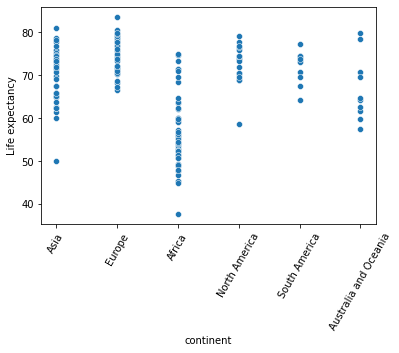

In [97]:
"Its time to plo the data"

ax = sns.scatterplot(x='continent', y='Life expectancy', data=df_merged)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

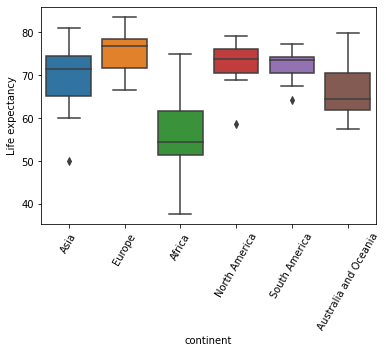

In [99]:
ax = sns.boxplot(x="continent", y="Life expectancy", data=df_merged)
plt.xticks(rotation = 60)